# 데이터 불러오기

In [1]:
import pandas as pd

ddata = pd.read_csv("ddata.wst.txt", encoding="euc-kr", sep="\t", names=["num","speaker","contents","tags"])
mdata = pd.read_csv("mdata.wst.txt", encoding="euc-kr", sep="\t", names=["id","part","category","exptype","exp"])

ddata.head()

,num,speaker,contents,tags
0,0,<CO>,어서 오 세 요 코디 봇 입 니다 무엇 을 도와 드릴_까 요,INTRO
1,1,<US>,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요,NaN
2,2,<CO>,신입생 코디 에 어울리 게 화사 한 스웨터 를 추천_해 드릴_게 요,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3,<AC>,SW-009,NaN
4,4,<US>,이 옷 에 어울리 는 치마 로 추천_해 주 세 요,USER_SUCCESS


In [2]:
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈 의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라 와 브이넥 네크라인 의 결합 스타일
2,BL-001,T,BL,F,손목 까지 내려오 는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨 에서 허리 까지 세로 절개 에 풍성 한 러플 장식


In [3]:
ddata = ddata.fillna("")

In [4]:
print(len(ddata), len(mdata))

154662 64632


# 1. "_" 제거하기

## (1) for문 이용하기 (너무 오래걸려서 안함)

In [5]:
cnt = 0 
for i in range(len(mdata)):
    cnt += 1
    if "_" in ddata.loc[i, "contents"]:
        ddata.loc[i, "contents"] = ddata.loc[i, "contents"].replace("_","")
    if cnt == 2:
        break
print(ddata.loc[0, "contents"])


어서 오 세 요 코디 봇 입 니다 무엇 을 도와 드릴까 요


## (2) replace() 이용하기
    왜인지는 모르겠으나 str.을 꼭 넣어줘야 함

In [6]:
ddata["contents"] = ddata["contents"].str.replace("_","")
ddata.head()

,num,speaker,contents,tags
0,0,<CO>,어서 오 세 요 코디 봇 입 니다 무엇 을 도와 드릴까 요,INTRO
1,1,<US>,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요,
2,2,<CO>,신입생 코디 에 어울리 게 화사 한 스웨터 를 추천해 드릴게 요,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3,<AC>,SW-009,
4,4,<US>,이 옷 에 어울리 는 치마 로 추천해 주 세 요,USER_SUCCESS


In [7]:
mdata["exp"] = mdata["exp"].str.replace("_","")
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈 의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라 와 브이넥 네크라인 의 결합 스타일
2,BL-001,T,BL,F,손목 까지 내려오 는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨 에서 허리 까지 세로 절개 에 풍성 한 러플 장식


# 2. Mdata 합치기

In [8]:
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈 의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라 와 브이넥 네크라인 의 결합 스타일
2,BL-001,T,BL,F,손목 까지 내려오 는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨 에서 허리 까지 세로 절개 에 풍성 한 러플 장식


In [9]:
mdata.iloc[0].id

'BL-001 '

In [10]:
c_mdata = pd.DataFrame({"id":[0],"exp":[None]})
c_mdata

,id,exp
0,0,None


## (1) for문 이용하기 (오래걸릴 거 같음)

In [11]:
mdata.loc[0,"exp"]+" "+mdata.loc[1,"exp"]

'단추 여밈 의 전체 오픈형 스탠드 칼라 와 브이넥 네크라인 의 결합 스타일'

In [12]:
id = ""
idx = 0
for i in range(len(mdata)):
    if id == mdata.loc[i, "id"]:
        c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] = c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] + " " + mdata.loc[i, "exp"]
    else:
        id = mdata.loc[i, "id"]
        c_mdata.loc[i, "id"] = id
        c_mdata.loc[i, "exp"] = mdata.loc[i, "exp"]

c_mdata.head()

,id,exp
0,BL-001,단추 여밈 의 전체 오픈형 스탠드 칼라 와 브이넥 네크라인 의 결합 스타일 손목 까...
20,BL-002,넓 은 셔츠 칼라 네크라인 앞 중심 에 반 오픈 끈 여밈 있 는 스타일 드롭 숄더 ...
38,BL-003,앞 중심 에 단추 여밈 칼라 가 없 는 넓고 깊게 파인 브이넥 엉덩이 밑 으로 내려...
63,BL-004,앞 중심 에 단추 여밈 칼라 가 없 는 라운드넥 으로 골반 위 에서 끝나 는 짧 은...
84,BL-005,앞 단추 여밈 의 전체 오픈형 칼라 가 없 는 라운드 넥크 라인 엉덩이 위 에서 끝...


In [13]:
c_mdata.iloc[0].id

'BL-001 '

In [14]:
for i in range(len(c_mdata)): # id 뒤에 공백 없애기
    c_mdata.iloc[i].id = c_mdata.iloc[i].id.strip()

print(c_mdata.iloc[0].id)
c_mdata.reset_index(drop=True,inplace=True)
c_mdata.head()

BL-001


,id,exp
0,BL-001,단추 여밈 의 전체 오픈형 스탠드 칼라 와 브이넥 네크라인 의 결합 스타일 손목 까...
1,BL-002,넓 은 셔츠 칼라 네크라인 앞 중심 에 반 오픈 끈 여밈 있 는 스타일 드롭 숄더 ...
2,BL-003,앞 중심 에 단추 여밈 칼라 가 없 는 넓고 깊게 파인 브이넥 엉덩이 밑 으로 내려...
3,BL-004,앞 중심 에 단추 여밈 칼라 가 없 는 라운드넥 으로 골반 위 에서 끝나 는 짧 은...
4,BL-005,앞 단추 여밈 의 전체 오픈형 칼라 가 없 는 라운드 넥크 라인 엉덩이 위 에서 끝...


1. _ 제거하기
2. mddata 설명 하나로 묶기
3. ddata co랑 ac 순서 바꾸기
    한 줄씩 가져와서
    현재 speaker가 ac라면
    temp == <ac>
    ddata.loc[i, "speaker"] == ddata.loc[i - 1, "speaker"] 근데 그냥 <co>
4. 문장 삭제하기 intro ending confirmshow 등
5. ac 뒤에 mddata 설명 붙이기
6. ddata의 문장 하나씩 붙이기
    if 이전 문장 인덱스 < 지금 문장 인덱스:
        앞 내용 뒤에 지금 내용 붙이기
최종 -> 정수 인코딩하기 


# 3. Ddata 합치기

In [15]:
ddata.drop(ddata.loc[ddata["tags"] == "INTRO"].index, inplace=True)
ddata.drop(ddata.loc[ddata["tags"] == "CLOSING"].index, inplace=True)
ddata.drop(ddata.loc[ddata["tags"] == "CONFIRM_SHOW"].index, inplace=True)
ddata.reset_index(drop=True, inplace = True)

In [16]:
ddata.head()

,num,speaker,contents,tags
0,1,<US>,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요,
1,2,<CO>,신입생 코디 에 어울리 게 화사 한 스웨터 를 추천해 드릴게 요,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
2,3,<AC>,SW-009,
3,4,<US>,이 옷 에 어울리 는 치마 로 추천해 주 세 요,USER_SUCCESS
4,5,<AC>,SK-016,


In [17]:
c_ddata = pd.DataFrame({"contents":[None], "label": [0]})
c_ddata

,contents,label
0,None,0


In [18]:
a = c_mdata.loc[c_mdata.id == "SW-009"].exp.values[0] #Series가 아닌 str으로 가져올 수 있게 하는 것
print(a)

라운드 네크라인 여밈 이 없 는 풀오버 스타일 전체 케이블 조직 드롭 숄더 슬리브 손등 까지 오 는 길이 의 소매 몸 에 적당히 맞 는 품 엉덩이 를 살짝 덮 는 길이 네크라인 소매 끝 밑단 에 고무단 처리 레이온 52% 나일론 20% 폴리에스터 28% 꽈배기 조직 플레인 조직 이 섞여있 는 형태 드라이 크리닝 단색 의 라임색 브라이트 톤 고명도 고채도 의 옐로우 그린 산뜻 하고 발랄 한 느낌 기본 의 단정 한 편안한 산뜻 한 발랄 한 경쾌 한 따뜻한 데일리 룩 캠퍼스 룩


In [19]:
sentence = ddata.loc[0, "contents"] # 맨 첫 대화셋의 맨 첫 문장 값 미리 넣어두기

for i in range(1, len(ddata)):
    cnt = ddata.loc[i, "contents"] #다이얼로그의 한 문장 가져오기

    if ddata.loc[i, "num"] > ddata.loc[i-1, "num"]: # 같은 대화셋 내 문장인 경우
        if ddata.loc[i, "speaker"] == "<AC>":
            if len(cnt) < 7:
                sentence = sentence + " " + cnt + " " + c_mdata.loc[c_mdata.id == cnt].exp.values[0] #series로 반환 안되게끔
            else: # 여러 옷을 추천하거나 컨펌 쇼인 경우
                for j in cnt.split():
                    sentence = sentence + " " + j + " " + c_mdata.loc[c_mdata.id == j].exp.values[0]

        elif ddata.loc[i, "tags"] == "SUCCESS":
            c_ddata.loc[i,"contents"] = sentence
            c_ddata.loc[i,"label"] = 1
        
        elif ddata.loc[i, "tags"] == "FAIL":
            c_ddata.loc[i,"contents"] = sentence
            c_ddata.loc[i,"label"] = 0
               
        else:
            sentence = sentence + " " + cnt

    else: #대화셋이 바뀌는 경우
        sentence =""
        sentence = sentence + cnt

In [20]:
c_ddata.head()

,contents,label
0,None,0.0
26,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0
51,동아리 에서 엠티 를 가는데 옷 이 필요해 요 코디 좀 부탁 드려요 CT-060 코...,1.0
87,데이트 갈 건데 코디 부탁합 니다 JK-089 트렌치 스타일 자켓 테일러드 칼라 리...,0.0
108,상견례 자리 에서 입 을 옷 이 필요해 요 자켓 에 어울리 는 코디로 추천해 주 세...,1.0


In [21]:
c_ddata.drop([0],inplace=True)
c_ddata.reset_index(drop=True, inplace=True)
c_ddata.head()

,contents,label
0,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0
1,동아리 에서 엠티 를 가는데 옷 이 필요해 요 코디 좀 부탁 드려요 CT-060 코...,1.0
2,데이트 갈 건데 코디 부탁합 니다 JK-089 트렌치 스타일 자켓 테일러드 칼라 리...,0.0
3,상견례 자리 에서 입 을 옷 이 필요해 요 자켓 에 어울리 는 코디로 추천해 주 세...,1.0
4,낮 에 자전거 를 타 려 는데 어울리 는 청바지 에 어울리 는 외투 찾아 주 세 요...,0.0


In [22]:
c_ddata.isna().sum()

contents    0
label       0
dtype: int64

일단 SUCCESS 랑 FAIL 기준으로 레이블링 했음

나중에는 dialogue랑 AC 문장 구분해서
<br>일반 문장은 dialogue에 저장하고
<br>ac 나오면 ac에 저장한다음
<br>user_fail 나올 경우 해당 문장도 dialogue에 붙이고 contents = dialogue + ac, label = 0
<br>user_success 나올 경우 해당 문장도 dialogue에 붙이고 contents = dialogue + ac, label = 1

# 4. 불용어 제거 및 차원 지정

In [23]:
stopwords = []
with open('불용어사전.txt', mode='rt', encoding='utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        stopwords.append(word)

In [24]:
stopwords[0:5]

['어찌됐든', '그위에', '게다가', '점에서', '보아']

In [25]:
len(c_ddata)

5452

In [26]:
x_data = c_ddata.contents
y_data = c_ddata.label.tolist()

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
X_data = []
count = 0
for sentence in x_data:
    temp_X = sentence.split() #문장 하나 가져오고 단어 단위로 쪼개기
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_data.append(temp_X)

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

In [30]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10556
등장 빈도가 2번 이하인 희귀 단어의 수: 2511
단어 집합에서 희귀 단어의 비율: 23.78741947707465
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.08795143254756226


In [31]:
vocab_size = total_cnt - rare_cnt + 1 # tokenizer 함수에 들어 갈 때 영향줘서 1 추가 해야 됨
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8046


In [32]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_data)
X_data = tokenizer.texts_to_sequences(X_data)

문장 최대 길이 : 2615
문장의 평균 길이 : 682.386463683052


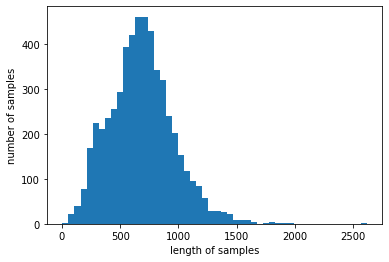

In [33]:
import matplotlib.pyplot as plt
print('문장 최대 길이 :',max(len(l) for l in X_data))
print('문장의 평균 길이 :',sum(map(len, X_data))/len(X_data))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 1300
below_threshold_len(max_len, X_data)

전체 샘플 중 길이가 1300 이하인 샘플의 비율: 97.7806309611152


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_data = pad_sequences(X_data, maxlen = max_len)

# 5. RNN 돌려보기

In [36]:
print(y_data[0:3])
y_data = list(map(int, y_data))
print(y_data[0:3])

[1.0, 1.0, 0.0]
[1, 1, 0]


In [37]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.3, random_state=777, stratify=y_data)
x_train.shape

(3816, 1300)

In [39]:
x_train[0]

array([  0,   0,   0, ..., 193, 438, 320], dtype=int32)

In [40]:
x_train.shape

(3816, 1300)

In [41]:
model = Sequential()
model.add(Embedding(vocab_size, 1300))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 1300)        10459800  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               731648    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 11,195,609
Trainable params: 11,195,609
Non-trainable params: 0
_________________________________________________________________


In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose= 1, save_best_only=True)

In [43]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=150, callbacks=[es, mc], batch_size=60, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/15
51/51 [==============================] - 26s 425ms/step - loss: 0.3661 - acc: 0.8452 - val_loss: 0.0718 - val_acc: 0.9751

Epoch 00001: val_acc improved from -inf to 0.97513, saving model to best_model.h5
Epoch 2/15
51/51 [==============================] - 21s 413ms/step - loss: 0.0327 - acc: 0.9888 - val_loss: 0.0572 - val_acc: 0.9856

Epoch 00002: val_acc improved from 0.97513 to 0.98560, saving model to best_model.h5
Epoch 3/15
51/51 [==============================] - 21s 413ms/step - loss: 0.0158 - acc: 0.9965 - val_loss: 0.0625 - val_acc: 0.9817

Epoch 00003: val_acc did not improve from 0.98560
Epoch 4/15
51/51 [==============================] - 21s 414ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.0819 - val_acc: 0.9791

Epoch 00004: val_acc did not improve from 0.98560
Epoch 5/15
51/51 [==============================] - 21s 413ms/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.1083 - val_acc: 0.9712

Epoch 00005: val_acc did not improve from 0.98560
Epoch 6/15
51

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


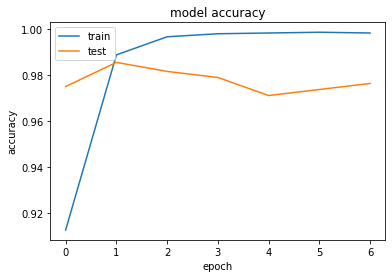

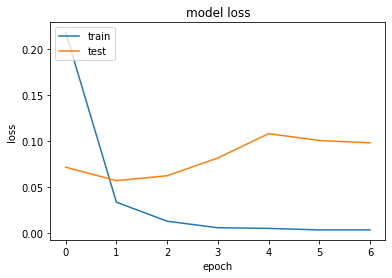

In [45]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=150, callbacks=[es, mc], batch_size=60, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/150
51/51 [==============================] - 24s 429ms/step - loss: 0.0028 - acc: 0.9988 - val_loss: 0.1340 - val_acc: 0.9712

Epoch 00001: val_acc did not improve from 0.98560
Epoch 2/150
51/51 [==============================] - 21s 419ms/step - loss: 0.0026 - acc: 0.9997 - val_loss: 0.0965 - val_acc: 0.9804

Epoch 00002: val_acc did not improve from 0.98560
Epoch 3/150
51/51 [==============================] - 21s 416ms/step - loss: 0.0046 - acc: 0.9976 - val_loss: 0.1026 - val_acc: 0.9804

Epoch 00003: val_acc did not improve from 0.98560
Epoch 4/150
51/51 [==============================] - 21s 407ms/step - loss: 4.9450e-04 - acc: 0.9999 - val_loss: 0.0955 - val_acc: 0.9830

Epoch 00004: val_acc did not improve from 0.98560
Epoch 5/150
51/51 [==============================] - 21s 413ms/step - loss: 5.6185e-04 - acc: 1.0000 - val_loss: 0.1033 - val_acc: 0.9843

Epoch 00005: val_acc did not improve from 0.98560
Epoch 6/150
51/51 [==============================] - 21s 410ms/step

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


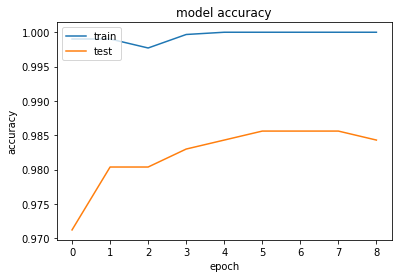

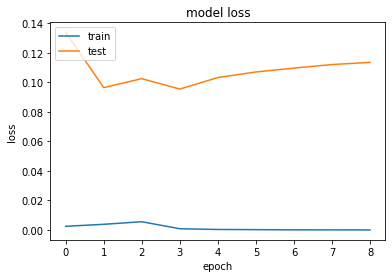

In [47]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
from tensorflow.keras.layers import Dropout

In [50]:
model = Sequential()
model.add(Embedding(vocab_size, 500))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 500)         4023000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               322048    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,349,209
Trainable params: 4,349,209
Non-trainable params: 0
____________________________________________

In [51]:
print(len(X_data))

5452


In [52]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose= 1, save_best_only=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=150, callbacks=[es, mc], batch_size=40, validation_split=0.2)

loaded_model = load_model('best_model_2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))